In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import scipy.optimize as opt
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.style as style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import folium
from folium import plugins
import json
import wget
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

## References

-Latinobarometro

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
wholedata = pd.read_csv('https://raw.githubusercontent.com/Jumarti96/Coursera_Capstone/master/Latinobarometro_2018_Esp_Spss_v20190303.csv', sep=';', low_memory=False)

In [4]:
wholedata.head(10)

,NUMINVES,IDENPA,NUMENTRE,REG,CIUDAD,TAMCIUD,COMDIST,EDAD,SEXO,CODENC,DIAREAL,MESREAL,INI,FIN,DURA,TOTREVI,TOTCUOT,TOTRECH,TOTPERD,NUMCASA,CODSUPER,SUPERVVI,SUPERVEN,CODIF,DIGIT,P1STC,P2STC,P3STGBSC,P4NC,P5NC,P6STGBSC,P7STGBSC,P8STIC,P9STGBSC,P10STC.A,P10STC.B,P10STC.C,P11STGBS,P12STGBS,P13STGBS.A,P13STGBS.B,P14ST,P15STGBSC.A,P15STGBSC.B,P15STGBSC.C,P15STGBSC.D,P15STGBSC.E,P15STGBSC.F,P15STGBSC.G,P15STGBSC.H,P16NC.A,P16NCB,P16NC.C,P16NC.D,P16NC.E,P16NC.F,P16NC.G,P17STC.A,P17STC.B,P17STC.C,P17STC.D,P17STC.E,P17STC.F,P17STC.G,P17STC.H,P17STC.I,P17STC.J,P17STC.K,P18GBS,P19ST.A,P19ST.B,P19ST.C,P19ST.D,P19ST.E,P19ST.F,P19ST.G,P19ST.H,P19NC.I,P19NC.J,P19F.K,P19ST.L,P19ST.M,P20STGBSC,P21STGBS.A,P21STGBS.B,P22ST,P23ST,P24ST,P25ST,P26ST,P27ND.A,P27ND.B,P27ND.C,P27ND.D,P28ND.A,P28ND.B,P28ND.C,P28ND.D,P28ND.E,P28ND.F,P28ND.G,P28ND.H,P28ND.I,P29NI.A,P29NI.B,P29NI.C,P29NI.D,P29NI.E,P29NI.F,P30NIR,P31NI,P31NIR,P32NI,P33NI,P34NI.AA,P34NI.AB,P34NI.AC,P34NI.AD,P34NI.AE,P34NI.BA,P34NI.BB,P34NI.BC,P34NI.BD,P34NI.BE,P34NI.BF,P34NI.CA,P34NI.CB,P34NI.CC,P34NI.CD,P34NI.CE,P34NI.CF,P35NI.A,P35NI.B,P35NI.C,P35NI.D,P35NI.E,P35NI.NC,P35NI.NA,P36NI.A,P36NI.B,P36NI.C,P36NI.D,P36NI.E,P36NI.F,P36NI.G,P36NI.NA,PN37NI.A,PN37NI.B,PN37NI.C,PN37NI.D,PN37NI.E,PN37NI.NA,P38NI,P39ST.A,P39ST.B,P40ST.A,P40ST.B,P40ST.C,P40ST.D,P40ST.E,P40N.F,P41ST.A,P41ST.B,P41ST.C,P41ST.D,P41STM.E,P42NC,P43N,P44STA.A,P44STA.B,P44STA.C,P44STA.D,P44STA.E,P44STA.F,P44STA.G,P44STA.H,P44STB.A,P44STB.B,P44STB.C,P44STB.D,P44STB.E,P44STB.F,P44STB.G,P44STB.H,P45ST.A,P45ST.B,P45ST.C,P45ST.D,P45ST.E,P46NC.A,P46NC.B,P46NC.C,P46NC.D,P46NC.E,P46NC.F,P47NC.A,P47NC.B,P47NC.C,P48NC.A,P48NC.B,P48NC.C,P48NC.D,P48NC.E,P48NC.F,P48NC.G,P48NC.H,P48NC.NC,P49NC,P50NC,P51STC.AA,P51STC.AB,P51STC.AC,P51STC.AD,P51STC.AE,P51STC.AF,P51STC.AG,P51STC.AH,P51STC.AI,P51STC.AJ,P51STC.AK,P51STC.AL,P51STC.AM,P51STC.AN,P51STC.AO,P51STC.AP,P51STC.AQ,P51STC.AR,P51STC.ANSNC,P51STC.BA,P51STC.BB,P51STC.BC,P51STC.BD,P51STC.BE,P51STC.BF,P51STC.BG,P51STC.BH,P51STC.BI,P51STC.BJ,P51STC.BK,P51STC.BL,P51STC.BM,P51STC.BN,P51STC.BO,P51STC.BP,P51STC.BQ,P51STC.BR,P51STC.NSNC,P52N.A,P52N.B,P52N.C,P52N.D,P52ST.E,P52N.F,P53N,P54N.A,P54N.B,P54N.C,P55N,P61N,P56N.A,P56N.B,P56N.C,P56N.D,P57N,P58N.A,P58N.B,P58N.C,PN59N.A,PN59N.B,PN59N.C,PN59N.D,PN59N.E,PN59N.F,PN59N.G,PN59N.H,PN59N.I,PN59N.J,PN59N.K,PN59N.NSNC,P60N.A,P60N.B,P60N.C,P60N.D,P60N.E,P60N.F,P60N.NSNC,P62N.A,P62N.B,P62C,P62D,P62E,P62N.F,P63N.A,P63N.B,P63N.C,P63N.D,P63N.E,P63N.F,P63N.G,P64N,P65N,P66STC,P67STC,P68ST.AA,P68ST.AB,P68ST.AC,P68ST.AD,P68ST.AE,P68ST.AF,P68ST.AG,P68ST.AH,P68ST.BA,P68ST.BB,P68ST.BC,P68ST.BD,P68ST.BE,P68ST.BF,P68ST.BG,P68ST.BH,P69ST.1,P69ST.2,P70ST,P71TI.A,P72TI.B,P73TI.C,P74TI.D,P75TI.E,P76TI.F,P77TI.G,P78TI.H,P79TI.I,P80STTI,P81NA,P82TIB,P83NB,S1,S2,S3,S4,S5,S5A,S6,S7,S8,S9,S10,S11,S12M.A,S12M.B,S12M.C,S12M.D,S12M.E,S12M.F,S12M.G,S12M.H,S12M.I,S12M.J,S12M.K,S13A,S13B,S13C,S14A,S14B,S15,S16,S17D,S18,S19A,S19B,S20,S21.A,S21.B,S21.C,S21.E,S21.F,S21.G,S21.I,S21.J,S21.K,S21.L,S21.M,S21.N,S21.O,S21.P,S23,S24,S25,S26,S27,REEDUC.1,REEDUC.2,REEDAD,PERPART,FAMPART,WT
0,2018,32,320001,32301,32001001,7,1,46,2,46,27,6,1436,1528,52,2,0,2,0,3,0,2,0,1,1,2,2,5,10,24,5,3,5,3,8,5,9,2,3,3,4,1,3,4,2,2,4,4,4,4,2,4,4,2,4,3,4,0,0,0,0,1,1,1,0,0,0,0,3,0,0,1,0,0,1,0,1,1,0,0,0,0,2,32022,2,4,3,3,3,2,1,-3,-3,-3,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,-3,-2,4,1,1,1,2,2,2,2,2,2,2,2,1,2,1,2,2,2,-2,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,2,4,2,2,3,2,3,4,3,2,3,2,2,1,1,2,1,2,2,2,2,1,2,3,2,3,2,2,2,2,3,5,2,8,7,5,0,1,0,0,0,0,3,2,2,0,0,1,0,0,0,0,0,0,6,4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,1,2,3,3,2,1,1,2,3,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,2,2,3,3,3,2,1,1,2,1,1,2,2,5,1,1,2,1,1,1,2,1,1,1,2,2,2,1,2,2,2,2,4,3,1,3,3,2,3,4,2,3,2,3,1,3,2,5,5,4,2,3,1,3,-2,1,1,14,8,13,0,0,0,0,0,0,0,0,0,1,0,1,1,2,1,-3,4,2,4,-3,-3,-3,-3,1,1,2,2,2,1,2,2,1,1,1,2,2,1,2,19711105,1,4,1,1,2,3,2,30,"1,496"
1,2018,32,320002,32301,32001001,7,1,79,2,46,13,7,1248,1330,42,0,0,

In [5]:
# Problems of country: P3STGBSC

controls = ['REEDUC.1', 'S26']
dependents = ['P15STGBSC.E', 'P15STGBSC.D', 'P15STGBSC.B', 'P15STGBSC.F', 'P1STC']
problems = ['P3STGBSC']
variables = problems + dependents + controls
problems_country = wholedata[['IDENPA', 'CIUDAD']].join(wholedata[variables])

In [6]:
problems_country.head(10)

,IDENPA,CIUDAD,P3STGBSC,P15STGBSC.E,P15STGBSC.D,P15STGBSC.B,P15STGBSC.F,P1STC,REEDUC.1,S26
0,32,32001001,5,4,2,4,4,2,1,4
1,32,32001001,35,4,3,4,4,2,1,3
2,32,32001001,24,2,3,3,2,2,3,3
3,32,32001001,96,2,1,1,2,2,1,3
4,32,32001001,9,2,2,2,2,2,3,2
5,32,32001001,5,3,3,2,1,3,2,3
6,32,32001001,35,4,3,4,4,2,1,2
7,32,32001001,9,4,4,3,3,4,1,4
8,32,32001001,34,2,3,2,3,2,2,3
9,32,32001001,9,4,4,4,4,1,2,2


In [7]:
problems_country.rename(columns={'IDENPA':'COUNTRY',
                                 'CIUDAD':'CIUDAD',
                                 'P15STGBSC.E':'TRUSTGOV',
                                 'P15STGBSC.D':'TRUSTCONG',
                                 'P15STGBSC.B':'TRUSTPOL',
                                 'P15STGBSC.F':'TRUSTJUST',
                                 'P1STC':'SATISF',
                                 'P3STGBSC':'PROBLEM',
                                 'P4NC':'PROBLEM',
                                 'P5NC':'PROBLEM',
                                 'REEDUC.1':'EDUCATION',
                                 'S26':'SOCIOECO'},
                        inplace=True)

In [8]:
problems_country.head(10)

,COUNTRY,CIUDAD,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO
0,32,32001001,5,4,2,4,4,2,1,4
1,32,32001001,35,4,3,4,4,2,1,3
2,32,32001001,24,2,3,3,2,2,3,3
3,32,32001001,96,2,1,1,2,2,1,3
4,32,32001001,9,2,2,2,2,2,3,2
5,32,32001001,5,3,3,2,1,3,2,3
6,32,32001001,35,4,3,4,4,2,1,2
7,32,32001001,9,4,4,3,3,4,1,4
8,32,32001001,34,2,3,2,3,2,2,3
9,32,32001001,9,4,4,4,4,1,2,2


In [9]:
problems_country.shape

(20204, 10)

In [10]:
problems_country = problems_country.drop(problems_country[problems_country.TRUSTCONG < 0].index)
problems_country = problems_country.drop(problems_country[problems_country.TRUSTGOV < 0].index)
problems_country = problems_country.drop(problems_country[problems_country.TRUSTPOL < 0].index)
problems_country = problems_country.drop(problems_country[problems_country.TRUSTJUST < 0].index)
problems_country = problems_country.drop(problems_country[problems_country.SATISF < 0].index)
problems_country = problems_country.drop(problems_country[problems_country.PROBLEM < 0].index)
problems_country = problems_country.drop(problems_country[problems_country.EDUCATION < 0].index)
problems_country = problems_country.drop(problems_country[problems_country.SOCIOECO < 0].index)
problems_country = problems_country.dropna(axis=0)
problems_country.reset_index(drop = True, inplace = True)

In [11]:
problems_country.shape

(18194, 10)

In [12]:
problems_country.head(10)

,COUNTRY,CIUDAD,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO
0,32,32001001,5,4,2,4,4,2,1,4
1,32,32001001,35,4,3,4,4,2,1,3
2,32,32001001,24,2,3,3,2,2,3,3
3,32,32001001,96,2,1,1,2,2,1,3
4,32,32001001,9,2,2,2,2,2,3,2
5,32,32001001,5,3,3,2,1,3,2,3
6,32,32001001,35,4,3,4,4,2,1,2
7,32,32001001,9,4,4,3,3,4,1,4
8,32,32001001,34,2,3,2,3,2,2,3
9,32,32001001,9,4,4,4,4,1,2,2


In [13]:
problems_country[['TRUSTCONG', 'TRUSTGOV', 'TRUSTPOL', 'TRUSTJUST', 'SATISF']] = problems_country[['TRUSTCONG', 'TRUSTGOV', 'TRUSTPOL', 'TRUSTJUST', 'SATISF']].replace([1, 2, 3, 4], [3, 2, 1, 0])
problems_country[['SOCIOECO']] = problems_country[['SOCIOECO']].replace([1, 2, 3, 4, 5], [4, 3, 2, 1, 0])

In [14]:
country_problems = problems_country

In [15]:
country_problems['TRUSTINST'] = (country_problems['TRUSTGOV'] +
                                country_problems['TRUSTCONG'] +
                                country_problems['TRUSTPOL'] +
                                country_problems['TRUSTJUST'])/4
country_problems.head()

,COUNTRY,CIUDAD,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO,TRUSTINST
0,32,32001001,5,0,2,0,0,2,1,1,0.50
1,32,32001001,35,0,1,0,0,2,1,2,0.25
2,32,32001001,24,2,1,1,2,2,3,2,1.50
3,32,32001001,96,2,3,3,2,2,1,2,2.50
4,32,32001001,9,2,2,2,2,2,3,3,2.00


In [16]:
problems_person = country_problems

In [17]:
problems_dummies = pd.get_dummies(country_problems['PROBLEM'])
problems_dummies.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
country_problems = country_problems.join(problems_dummies)
country_problems.head(10)

,COUNTRY,CIUDAD,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO,TRUSTINST,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97
0,32,32001001,5,0,2,0,0,2,1,1,0.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,32,32001001,35,0,1,0,0,2,1,2,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,32,32001001,24,2,1,1,2,2,3,2,1.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,32,32001001,96,2,3,3,2,2,1,2,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,32,32001001,9,2,2,2,2,2,3,3,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,32,32001001,5,1,1,2,3,1,2,2,1.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,32,32001001,35,0,1,0,0,2,1,3,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,32,32001001,9,0,0,1,1,0,1,1,0.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,32,32001001,34,2,1,2,1,2,2,2,1.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,32,32001001,9,0,0,0,0,3,2,3,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(32, 'Argentina')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(68, 'Bolivia')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(76, 'Brazil')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(152, 'Chile')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(170, 'Colombia')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(188, 'Costa Rica')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(214, 'República Dominicana')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(218, 'Ecuador')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(222, 'El Salvador')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(320, 'Guatemala')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(340, 'Honduras')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(484, 'México')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(558, 'Nicaragua')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(591, 'Panamá')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(600, 'Paraguay')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(604, 'Perú')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(858, 'Uruguay')
country_problems['COUNTRY'] = country_problems['COUNTRY'].replace(862, 'Venezuela')

In [20]:
country_problems.head()

,COUNTRY,CIUDAD,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO,TRUSTINST,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97
0,Argentina,32001001,5,0,2,0,0,2,1,1,0.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Argentina,32001001,35,0,1,0,0,2,1,2,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Argentina,32001001,24,2,1,1,2,2,3,2,1.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Argentina,32001001,96,2,3,3,2,2,1,2,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Argentina,32001001,9,2,2,2,2,2,3,3,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
country_problems_backup = country_problems

In [22]:
codebook = pd.read_excel('https://github.com/Jumarti96/Coursera_Capstone/blob/master/city_codebook.xlsx?raw=true')
codebook.head()

,CODE,COUNTRY,CIUDAD
0,32001001,AR:,Capital Federal-Ciudad de Buenos Aires
1,32101000,AR:,Mendoza-Gran Mendoza
2,32201005,AR:,Chaco-Basail
3,32203004,AR:,Entre Ríos-San Antonio de Padua de la Concordia
4,32209009,AR:,Salta-Gran Salta


In [23]:
REGION = codebook['CIUDAD'].str.split("-", n=1, expand=True)
codebook['REGION'] = REGION[0]
codebook.head()

,CODE,COUNTRY,CIUDAD,REGION
0,32001001,AR:,Capital Federal-Ciudad de Buenos Aires,Capital Federal
1,32101000,AR:,Mendoza-Gran Mendoza,Mendoza
2,32201005,AR:,Chaco-Basail,Chaco
3,32203004,AR:,Entre Ríos-San Antonio de Padua de la Concordia,Entre Ríos
4,32209009,AR:,Salta-Gran Salta,Salta


In [24]:
REGION = []
for index, row in country_problems.iterrows():
    for i, rowc in codebook.iterrows():
        if row['CIUDAD'] == rowc['CODE']:
            REGION.append(rowc['REGION'])
            break

In [25]:
country_problems.rename(columns={'CIUDAD':'REGION'}, inplace=True)
country_problems['REGION'] = REGION
country_problems.head()

,COUNTRY,REGION,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO,TRUSTINST,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97
0,Argentina,Capital Federal,5,0,2,0,0,2,1,1,0.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Argentina,Capital Federal,35,0,1,0,0,2,1,2,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Argentina,Capital Federal,24,2,1,1,2,2,3,2,1.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Argentina,Capital Federal,96,2,3,3,2,2,1,2,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Argentina,Capital Federal,9,2,2,2,2,2,3,3,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
country_problems2 = country_problems.groupby(['COUNTRY', 'REGION']).mean().reset_index(drop=False)
counts = country_problems[['COUNTRY', 'REGION', 'TRUSTGOV']].groupby(['COUNTRY', 'REGION']).count()
counts = list(counts['TRUSTGOV'])
country_problems2['counts'] = counts
country_problems2.head(20)

,COUNTRY,REGION,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO,TRUSTINST,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97,counts
0,Argentina,Capital Federal,16.429448,0.726994,0.944785,1.061350,0.855828,1.966258,1.914110,2.616564,0.897239,0.006135,0.000000,0.067485,0.012270,0.174847,0.049080,0.000000,0.0,0.300613,0.000000,0.055215,0.000000,0.021472,0.000000,0.000000,0.000000,0.000000,0.006135,0.000000,0.000000,0.0,0.000000,0.000000,0.131902,0.000000,0.000000,0.0,0.000000,0.006135,0.000000,0.000000,0.000000,0.024540,0.107362,0.000000,0.0,0.003067,0.0,0.000000,0.0,0.0,0.033742,0.000000,326
1,Argentina,Chaco,22.923077,0.846154,1.076923,2.153846,1.076923,2.153846,1.923077,2.615385,1.288462,0.000000,0.000000,0.000000,0.000000,0.230769,0.230769,0.000000,0.0,0.230769,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.153846,0.000000,13
2,Argentina,Córdoba,21.312500,1.053571,1.107143,1.250000,1.026786,2.151786,2.142857,3.062500,1.109375,0.008929,0.000000,0.053571,0.008929,0.116071,0.035714,0.000000,0.0,0.375000,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.080357,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.044643,0.116071,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.089286,0.000000,112
3,Argentina,Entre Ríos,16.000000,0.743590,1.076923,1.461538,1.051282,2.230769,1.743590,2.974359,1.083333,0.000000,0.000000,0.230769,0.000000,0.230769,0.025641,0.000000,0.0,0.179487,0.000000,0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.102564,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,0.076923,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.051282,0.000000,39
4,Argentina,La Pampa,9.363636,1.181818,1.090909,1.727273,1.090909,2.181818,2.000000,2.909091,1.272727,0.000000,0.000000,0.090909,0.000000,0.363636,0.272727,0.000000,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,11
5,Argentina,Mendoza,22.461538,1.192308,0.923077,1.576923,0.730769,2.269231,2.384615,2.653846,1.105769,0.000000,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.0,0.307692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.192308,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.346154,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,26
6,Argentina,Neuquén,25.181818,0.590909,0.727273,1.136364,0.772727,2.045455,1.795455,2.863636,0.806818,0.000000,0.000000,0.045455,0.000000,0.068182,0.045455,0.000000,0.0,0.295455,0.022727,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.136364,0.000000,0.000000,0.0,0.000000,0.022727,0.000000,0.000000,0.000000,0.136364,0.113636,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.000000,44
7,Argentina,Provincia de Buenos Aires,21.278689,0.904918,0.947541,1.301639,0.918033,2.140984,2.190164,2.806557,1.018033,0.000000,0.000000,0.055738,0.009836,0.114754,0.036066,0.000000,0.0,0.324590,0.000000,0.075410,0.006557,0.006557,0.000000,0.000000,0.003279,0.000000,0.013115,0.006557,0.000000,0.0,0.000000,0.000000,0.085246,0.000000,0.000000,0.0,0.003279,0.003279,0.000000,0.000000,0.000000,0.045902,0.131148,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.068852,0.009836,305
8,Argentina,Río Negro,24.296296,0.679012,0.888889,1.172840,0.753086,1.765432,1.962963,2.7

In [27]:
print('Number of responses by region: ', country_problems2[['REGION', 'counts']])
print('\n -------------- \n')
print('Average number of responses: ', country_problems2['counts'].mean())
print('\n -------------- \n')
print('Median of the number of responses: ', country_problems2['counts'].median())
print('\n -------------- \n')
print('Number of regions taking all into account: ', country_problems2.shape[0])

Number of responses by region:                                                 REGION  counts
0                                     Capital Federal     326
1                                               Chaco      13
2                                             Córdoba     112
3                                          Entre Ríos      39
4                                            La Pampa      11
5                                             Mendoza      26
6                                             Neuquén      44
7                           Provincia de Buenos Aires     305
8                                           Río Negro      81
9                                               Salta      17
10                                           Santa Fé      72
11                                            Tucumán      70
12                                               Beni      32
13                                         Chuquisaca      60
14                                    

In [28]:
chosen_ones = country_problems2[country_problems2['counts'] >= 30]
chosen_ones.head()

,COUNTRY,REGION,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO,TRUSTINST,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97,counts
0,Argentina,Capital Federal,16.429448,0.726994,0.944785,1.061350,0.855828,1.966258,1.914110,2.616564,0.897239,0.006135,0.0,0.067485,0.012270,0.174847,0.049080,0.0,0.0,0.300613,0.000000,0.055215,0.000000,0.021472,0.0,0.0,0.000000,0.0,0.006135,0.000000,0.0,0.0,0.0,0.0,0.131902,0.0,0.0,0.0,0.000000,0.006135,0.0,0.0,0.0,0.024540,0.107362,0.0,0.0,0.003067,0.0,0.0,0.0,0.0,0.033742,0.000000,326
2,Argentina,Córdoba,21.312500,1.053571,1.107143,1.250000,1.026786,2.151786,2.142857,3.062500,1.109375,0.008929,0.0,0.053571,0.008929,0.116071,0.035714,0.0,0.0,0.375000,0.000000,0.035714,0.000000,0.035714,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.080357,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.044643,0.116071,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.089286,0.000000,112
3,Argentina,Entre Ríos,16.000000,0.743590,1.076923,1.461538,1.051282,2.230769,1.743590,2.974359,1.083333,0.000000,0.0,0.230769,0.000000,0.230769,0.025641,0.0,0.0,0.179487,0.000000,0.051282,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.102564,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.051282,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.051282,0.000000,39
6,Argentina,Neuquén,25.181818,0.590909,0.727273,1.136364,0.772727,2.045455,1.795455,2.863636,0.806818,0.000000,0.0,0.045455,0.000000,0.068182,0.045455,0.0,0.0,0.295455,0.022727,0.022727,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.136364,0.0,0.0,0.0,0.000000,0.022727,0.0,0.0,0.0,0.136364,0.113636,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.000000,44
7,Argentina,Provincia de Buenos Aires,21.278689,0.904918,0.947541,1.301639,0.918033,2.140984,2.190164,2.806557,1.018033,0.000000,0.0,0.055738,0.009836,0.114754,0.036066,0.0,0.0,0.324590,0.000000,0.075410,0.006557,0.006557,0.0,0.0,0.003279,0.0,0.013115,0.006557,0.0,0.0,0.0,0.0,0.085246,0.0,0.0,0.0,0.003279,0.003279,0.0,0.0,0.0,0.045902,0.131148,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.068852,0.009836,305


In [29]:
country_problems555 = country_problems[country_problems['REGION'].isin(chosen_ones['REGION'])]
country_problems555.reset_index(drop=True, inplace=True)

In [30]:
country_problems555.shape

(15731, 54)

In [31]:
country_responses = pd.DataFrame(country_problems555.groupby('COUNTRY')['COUNTRY'].count())
country_responses

,COUNTRY
COUNTRY,
Argentina,1049
Bolivia,1014
Brazil,871
Chile,1023
Colombia,1017
Costa Rica,929
Ecuador,917
El Salvador,843
Guatemala,590


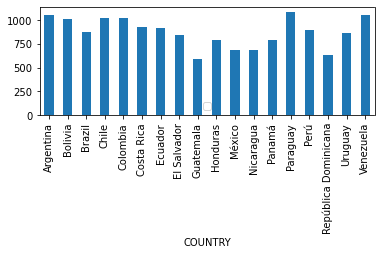

In [32]:
country_responses.plot(kind='bar', figsize=(6, 2))
plt.legend("")

In [33]:
satisf_country = pd.DataFrame(country_problems555.groupby(['COUNTRY', 'SATISF'])['SATISF'].count())
satisf_country.rename(columns={'SATISF':'COUNT'}, inplace=True)
satisf_country.reset_index(drop=False, inplace=True)
totals = pd.DataFrame(satisf_country.groupby('COUNTRY')['COUNT'].sum())
TOTAL = []
for i, row in satisf_country.iterrows():
    for index, r in totals.iterrows():
        if row['COUNTRY'] == index:
            TOTAL.append(r['COUNT'])
            break
satisf_country['TOTAL'] = TOTAL
satisf_country['PORTION'] = (satisf_country['COUNT']/satisf_country['TOTAL'])*100
satisf_country['SATISF'] = satisf_country['SATISF'].replace([0, 1, 2, 3], ['Not satisfied at all', 'Not too satisfied', 'Very satisfied', 'Greatly satisfied'])
satisf_country

,COUNTRY,SATISF,COUNT,TOTAL,PORTION
0,Argentina,Not satisfied at all,61,1049,5.815062
1,Argentina,Not too satisfied,176,1049,16.777884
2,Argentina,Very satisfied,480,1049,45.757865
3,Argentina,Greatly satisfied,332,1049,31.649190
4,Bolivia,Not satisfied at all,37,1014,3.648915
5,Bolivia,Not too satisfied,346,1014,34.122288
6,Bolivia,Very satisfied,405,1014,39.940828
7,Bolivia,Greatly satisfied,226,1014,22.287968
8,Brazil,Not satisfied at all,71,871,8.151550
9,Brazil,Not too satisfied,246,871,28.243398


<function matplotlib.pyplot.show(*args, **kw)>

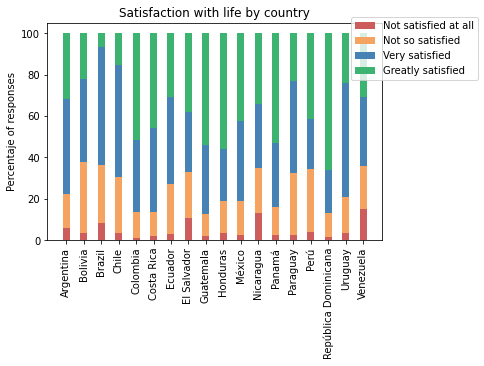

In [34]:
labels = list(satisf_country['COUNTRY'].unique())
not_satisf = satisf_country[satisf_country['SATISF'] == 'Not satisfied at all']['PORTION']
little_satisf = satisf_country[satisf_country['SATISF'] == 'Not too satisfied']['PORTION']
very_satisf = satisf_country[satisf_country['SATISF'] == 'Very satisfied']['PORTION']
greatly_satisf = satisf_country[satisf_country['SATISF'] == 'Greatly satisfied']['PORTION']
width = 0.40

bottom_very_satisf = [i + j for i, j in zip(little_satisf, not_satisf)]
bottom_greatly_satisf = [i + j for i, j in zip(bottom_very_satisf, very_satisf)]

fig, ax = plt.subplots()
ax.bar(labels, not_satisf, width, color='indianred')
ax.bar(labels, little_satisf, width, bottom=not_satisf, color='sandybrown')
ax.bar(labels, very_satisf, width, bottom=bottom_very_satisf, color='steelblue')
ax.bar(labels, greatly_satisf, width, bottom=bottom_greatly_satisf, color='mediumseagreen')

ax.set_ylabel('Percentaje of responses')
ax.set_title('Satisfaction with life by country')
ax.legend(loc='upper right', labels=['Not satisfied at all',
                                    'Not so satisfied',
                                    'Very satisfied',
                                    'Greatly satisfied'],
         bbox_to_anchor=(1.3, 1.05))
plt.xticks(rotation=90)
plt.show

In [35]:
trustinst_country = pd.DataFrame(country_problems555.groupby(['COUNTRY', 'TRUSTGOV'])['TRUSTGOV'].count())
trustinst_country.rename(columns={'TRUSTGOV':'COUNT'}, inplace=True)
trustinst_country.reset_index(drop=False, inplace=True)
totals = pd.DataFrame(satisf_country.groupby('COUNTRY')['COUNT'].sum())
TOTAL = []
for i, row in trustinst_country.iterrows():
    for index, r in totals.iterrows():
        if row['COUNTRY'] == index:
            TOTAL.append(r['COUNT'])
            break
trustinst_country['TOTAL'] = TOTAL
trustinst_country['PORTION'] = (trustinst_country['COUNT']/trustinst_country['TOTAL'])*100
trustinst_country['TRUSTGOV'] = trustinst_country['TRUSTGOV'].replace([0, 1, 2, 3], ['No trust at all', 'Low trust', 'Some trust', 'Trust a lot'])
trustinst_country

,COUNTRY,TRUSTGOV,COUNT,TOTAL,PORTION
0,Argentina,No trust at all,499,1049,47.569113
1,Argentina,Low trust,302,1049,28.789323
2,Argentina,Some trust,188,1049,17.921830
3,Argentina,Trust a lot,60,1049,5.719733
4,Bolivia,No trust at all,344,1014,33.925049
5,Bolivia,Low trust,349,1014,34.418146
6,Bolivia,Some trust,232,1014,22.879684
7,Bolivia,Trust a lot,89,1014,8.777120
8,Brazil,No trust at all,526,871,60.390356
9,Brazil,Low trust,295,871,33.869116


<function matplotlib.pyplot.show(*args, **kw)>

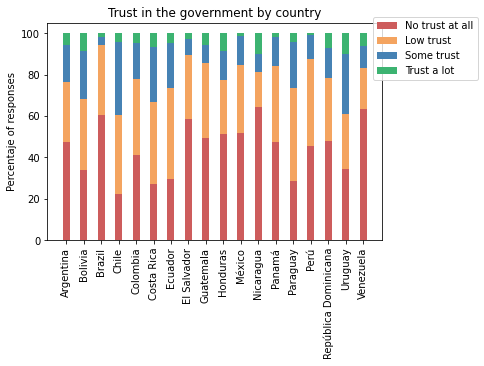

In [36]:
labels = list(trustinst_country['COUNTRY'].unique())
not_satisf = trustinst_country[trustinst_country['TRUSTGOV'] == 'No trust at all']['PORTION']
little_satisf = trustinst_country[trustinst_country['TRUSTGOV'] == 'Low trust']['PORTION']
very_satisf = trustinst_country[trustinst_country['TRUSTGOV'] == 'Some trust']['PORTION']
greatly_satisf = trustinst_country[trustinst_country['TRUSTGOV'] == 'Trust a lot']['PORTION']
width = 0.40

bottom_very_satisf = [i + j for i, j in zip(little_satisf, not_satisf)]
bottom_greatly_satisf = [i + j for i, j in zip(bottom_very_satisf, very_satisf)]

fig, ax = plt.subplots()
ax.bar(labels, not_satisf, width, color='indianred')
ax.bar(labels, little_satisf, width, bottom=not_satisf, color='sandybrown')
ax.bar(labels, very_satisf, width, bottom=bottom_very_satisf, color='steelblue')
ax.bar(labels, greatly_satisf, width, bottom=bottom_greatly_satisf, color='mediumseagreen')

ax.set_ylabel('Percentaje of responses')
ax.set_title('Trust in the government by country')
ax.legend(loc='upper right', labels=['No trust at all',
                                    'Low trust',
                                    'Some trust',
                                    'Trust a lot'],
         bbox_to_anchor=(1.3, 1.05))
plt.xticks(rotation=90)
plt.show

In [37]:
country_problems = country_problems2.drop(country_problems2[country_problems2.counts < 30].index)
country_problems = country_problems.drop(columns=('PROBLEM'))
country_problems.drop('counts', axis=1, inplace=True)
country_problems.reset_index(drop=True, inplace=True)

country_problems.head()

,COUNTRY,REGION,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO,TRUSTINST,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97
0,Argentina,Capital Federal,0.726994,0.944785,1.061350,0.855828,1.966258,1.914110,2.616564,0.897239,0.006135,0.0,0.067485,0.012270,0.174847,0.049080,0.0,0.0,0.300613,0.000000,0.055215,0.000000,0.021472,0.0,0.0,0.000000,0.0,0.006135,0.000000,0.0,0.0,0.0,0.0,0.131902,0.0,0.0,0.0,0.000000,0.006135,0.0,0.0,0.0,0.024540,0.107362,0.0,0.0,0.003067,0.0,0.0,0.0,0.0,0.033742,0.000000
1,Argentina,Córdoba,1.053571,1.107143,1.250000,1.026786,2.151786,2.142857,3.062500,1.109375,0.008929,0.0,0.053571,0.008929,0.116071,0.035714,0.0,0.0,0.375000,0.000000,0.035714,0.000000,0.035714,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.080357,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.044643,0.116071,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.089286,0.000000
2,Argentina,Entre Ríos,0.743590,1.076923,1.461538,1.051282,2.230769,1.743590,2.974359,1.083333,0.000000,0.0,0.230769,0.000000,0.230769,0.025641,0.0,0.0,0.179487,0.000000,0.051282,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.102564,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.051282,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.051282,0.000000
3,Argentina,Neuquén,0.590909,0.727273,1.136364,0.772727,2.045455,1.795455,2.863636,0.806818,0.000000,0.0,0.045455,0.000000,0.068182,0.045455,0.0,0.0,0.295455,0.022727,0.022727,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.136364,0.0,0.0,0.0,0.000000,0.022727,0.0,0.0,0.0,0.136364,0.113636,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.000000
4,Argentina,Provincia de Buenos Aires,0.904918,0.947541,1.301639,0.918033,2.140984,2.190164,2.806557,1.018033,0.000000,0.0,0.055738,0.009836,0.114754,0.036066,0.0,0.0,0.324590,0.000000,0.075410,0.006557,0.006557,0.0,0.0,0.003279,0.0,0.013115,0.006557,0.0,0.0,0.0,0.0,0.085246,0.0,0.0,0.0,0.003279,0.003279,0.0,0.0,0.0,0.045902,0.131148,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.068852,0.009836


In [38]:
country_problems.shape

(176, 53)

In [39]:
problems = country_problems.drop(['COUNTRY', 'REGION', 'TRUSTINST', 'TRUSTGOV', 'TRUSTCONG', 'TRUSTPOL', 'TRUSTJUST', 'SATISF', 'EDUCATION', 'SOCIOECO'], axis = 1)
problems.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97
0,0.006135,0.0,0.067485,0.012270,0.174847,0.049080,0.0,0.0,0.300613,0.000000,0.055215,0.000000,0.021472,0.0,0.0,0.000000,0.0,0.006135,0.000000,0.0,0.0,0.0,0.0,0.131902,0.0,0.0,0.0,0.000000,0.006135,0.0,0.0,0.0,0.024540,0.107362,0.0,0.0,0.003067,0.0,0.0,0.0,0.0,0.033742,0.000000
1,0.008929,0.0,0.053571,0.008929,0.116071,0.035714,0.0,0.0,0.375000,0.000000,0.035714,0.000000,0.035714,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.080357,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.044643,0.116071,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.089286,0.000000
2,0.000000,0.0,0.230769,0.000000,0.230769,0.025641,0.0,0.0,0.179487,0.000000,0.051282,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.102564,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.051282,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.051282,0.000000
3,0.000000,0.0,0.045455,0.000000,0.068182,0.045455,0.0,0.0,0.295455,0.022727,0.022727,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.136364,0.0,0.0,0.0,0.000000,0.022727,0.0,0.0,0.0,0.136364,0.113636,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.000000
4,0.000000,0.0,0.055738,0.009836,0.114754,0.036066,0.0,0.0,0.324590,0.000000,0.075410,0.006557,0.006557,0.0,0.0,0.003279,0.0,0.013115,0.006557,0.0,0.0,0.0,0.0,0.085246,0.0,0.0,0.0,0.003279,0.003279,0.0,0.0,0.0,0.045902,0.131148,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.068852,0.009836


In [40]:
problems_codebook = pd.read_excel('https://github.com/Jumarti96/Coursera_Capstone/blob/master/problems_codebook.xlsx?raw=true')
problems_codebook

,CODE,LABEL
0,1,Low wages
1,2,Instability in employment
2,3,Poverty
3,4,"Bad income distribution, social injustice"
4,5,Unemployment / unemployment
5,6,Inflation / price increase
6,7,Transportation
7,8,Energy problems
8,9,The economy / economic / financial problems
9,10,"Poor basic services (water, electricity, etc.)"


In [41]:
problems.columns = problems_codebook['LABEL']
cluster_dataset = problems
problems.head()

LABEL,Low wages,Instability in employment,Poverty,"Bad income distribution, social injustice",Unemployment / unemployment,Inflation / price increase,Transportation,Energy problems,The economy / economic / financial problems,"Poor basic services (water, electricity, etc.)",Education problems,Housing / room problems,Health problems,Environmental problems,Global warming,Pollution,"Gas, fuel, scarcity, shortage.","Food, scarce",Lack of opportunities for youth,"Violation of human rights,",Lack of freedom of expression,"State violence, state repression",Terrorism / guerrilla,Crime / public safety,Violence / gangs,Intrafamily violence,Verbal violence,Drug trafficking,Consumption of drugs,Racial discrimination,Borderline problems,Problems with neighbor countries,Corruption,Political situation / problems of politics,Immigrants,Foreigners,Lack of concern for the elderly,"Lack of parks, places of recreation",All is very expensive,"A lot of dirt, lack of cleanliness",Infraestructures,Other,No problems
0,0.006135,0.0,0.067485,0.012270,0.174847,0.049080,0.0,0.0,0.300613,0.000000,0.055215,0.000000,0.021472,0.0,0.0,0.000000,0.0,0.006135,0.000000,0.0,0.0,0.0,0.0,0.131902,0.0,0.0,0.0,0.000000,0.006135,0.0,0.0,0.0,0.024540,0.107362,0.0,0.0,0.003067,0.0,0.0,0.0,0.0,0.033742,0.000000
1,0.008929,0.0,0.053571,0.008929,0.116071,0.035714,0.0,0.0,0.375000,0.000000,0.035714,0.000000,0.035714,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.080357,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.044643,0.116071,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.089286,0.000000
2,0.000000,0.0,0.230769,0.000000,0.230769,0.025641,0.0,0.0,0.179487,0.000000,0.051282,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.102564,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.051282,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.051282,0.000000
3,0.000000,0.0,0.045455,0.000000,0.068182,0.045455,0.0,0.0,0.295455,0.022727,0.022727,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.136364,0.0,0.0,0.0,0.000000,0.022727,0.0,0.0,0.0,0.136364,0.113636,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.000000
4,0.000000,0.0,0.055738,0.009836,0.114754,0.036066,0.0,0.0,0.324590,0.000000,0.075410,0.006557,0.006557,0.0,0.0,0.003279,0.0,0.013115,0.006557,0.0,0.0,0.0,0.0,0.085246,0.0,0.0,0.0,0.003279,0.003279,0.0,0.0,0.0,0.045902,0.131148,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.068852,0.009836


In [42]:
def return_common_problems(row, n_problems):
    problems_labels = row.iloc[1:]
    problems_labels_sorted = problems_labels.sort_values(ascending=False)
    return problems_labels_sorted.index.values[0:n_problems]

In [43]:
n_problems = 5
indicators = ['st', 'nd', 'rd']
columns = ['REGION']
for ind in np.arange(n_problems):
    try:
        columns.append('{}{} Most Common Problem'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Problem'.format(ind+1))

In [44]:
problems_sorted = pd.DataFrame(columns=columns)
problems_sorted['REGION'] = country_problems['REGION']
for ind in np.arange(problems_sorted.shape[0]):
    problems_sorted.iloc[ind, 1:] = return_common_problems(problems.iloc[ind, :], n_problems)
problems_sorted.head()

,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem
0,Capital Federal,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Poverty
1,Córdoba,The economy / economic / financial problems,Unemployment / unemployment,Political situation / problems of politics,Other,Crime / public safety
2,Entre Ríos,Poverty,Unemployment / unemployment,The economy / economic / financial problems,Crime / public safety,Political situation / problems of politics
3,Neuquén,The economy / economic / financial problems,Crime / public safety,Corruption,Political situation / problems of politics,Other
4,Provincia de Buenos Aires,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Crime / public safety,Education problems


In [45]:
country_problems = country_problems[['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'SATISF', 'EDUCATION', 'SOCIOECO']].join(problems_sorted).reset_index(drop=True)
country_problems.head()

,COUNTRY,TRUSTGOV,TRUSTINST,SATISF,EDUCATION,SOCIOECO,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem
0,Argentina,0.726994,0.897239,1.966258,1.914110,2.616564,Capital Federal,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Poverty
1,Argentina,1.053571,1.109375,2.151786,2.142857,3.062500,Córdoba,The economy / economic / financial problems,Unemployment / unemployment,Political situation / problems of politics,Other,Crime / public safety
2,Argentina,0.743590,1.083333,2.230769,1.743590,2.974359,Entre Ríos,Poverty,Unemployment / unemployment,The economy / economic / financial problems,Crime / public safety,Political situation / problems of politics
3,Argentina,0.590909,0.806818,2.045455,1.795455,2.863636,Neuquén,The economy / economic / financial problems,Crime / public safety,Corruption,Political situation / problems of politics,Other
4,Argentina,0.904918,1.018033,2.140984,2.190164,2.806557,Provincia de Buenos Aires,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Crime / public safety,Education problems


In [46]:
locator = Nominatim(user_agent='explorer')
location = locator.geocode('Departamento de La Paz, El Salvador')
location

Location(Departamento de La Paz, El Salvador, (13.46697665, -88.98506215043079, 0.0))

In [47]:
latitude = []
longitude = []
def get_location(region, country):
    try:
        address = region + ', ' + country
        locator = Nominatim(user_agent='explorer')
        global location
        location = locator.geocode(address)
    except:
        get_location(region, country)
        
for index, row in country_problems.iterrows():
    region = row['REGION']
    country = row['COUNTRY']
    get_location(region, country)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
        
country_problems['Latitude'] = latitude
country_problems['Longitude'] = longitude
country_problems

,COUNTRY,TRUSTGOV,TRUSTINST,SATISF,EDUCATION,SOCIOECO,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,Latitude,Longitude
0,Argentina,0.726994,0.897239,1.966258,1.914110,2.616564,Capital Federal,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Poverty,-34.607568,-58.437089
1,Argentina,1.053571,1.109375,2.151786,2.142857,3.062500,Córdoba,The economy / economic / financial problems,Unemployment / unemployment,Political situation / problems of politics,Other,Crime / public safety,-31.417339,-64.183319
2,Argentina,0.743590,1.083333,2.230769,1.743590,2.974359,Entre Ríos,Poverty,Unemployment / unemployment,The economy / economic / financial problems,Crime / public safety,Political situation / problems of politics,-31.625284,-59.353958
3,Argentina,0.590909,0.806818,2.045455,1.795455,2.863636,Neuquén,The economy / economic / financial problems,Crime / public safety,Corruption,Political situation / problems of politics,Other,-38.369506,-69.832275
4,Argentina,0.904918,1.018033,2.140984,2.190164,2.806557,Provincia de Buenos Aires,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Crime / public safety,Education problems,-36.378993,-60.385589
5,Argentina,0.679012,0.873457,1.765432,1.962963,2.703704,Río Negro,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Other,Crime / public safety,-40.481197,-67.614591
6,Argentina,0.902778,1.017361,1.916667,1.847222,2.986111,Santa Fé,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Education problems,-30.315474,-61.164508
7,Argentina,0.742857,0.925000,1.985714,2.042857,2.585714,Tucumán,The economy / economic / financial problems,Unemployment / unemployment,Inflation / price increase,Crime / public safety,Political situation / problems of politics,-26.564358,-64.882397
8,Bolivia,1.375000,1.234375,1.906250,1.875000,2.375000,Beni,Unemployment / unemployment,Lack of opportunities for youth,Violence / gangs,Drug trafficking,Crime / public safety,-14.000000,-65.000000
9,Bolivia,0.666667,0.708333,1.633333,1.966667,2.300000,Chuquisaca,Unemployment / unemployment,Poverty,Corruption,Instability in employment,The economy / economic / financial problems,-19.047725,-65.259431


In [48]:
latin_america_map = folium.Map(location=[-15.792254, -60.731036], zoom_start=3.2, tiles='Stamen Toner')
for latitude, longitude, country, region in zip(country_problems['Latitude'], country_problems['Longitude'], country_problems['COUNTRY'], country_problems['REGION']):
    label = '{}, {}'.format(region, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        parse_html=False).add_to(latin_america_map)

latin_america_map

In [49]:
cluster_dataset

LABEL,Low wages,Instability in employment,Poverty,"Bad income distribution, social injustice",Unemployment / unemployment,Inflation / price increase,Transportation,Energy problems,The economy / economic / financial problems,"Poor basic services (water, electricity, etc.)",Education problems,Housing / room problems,Health problems,Environmental problems,Global warming,Pollution,"Gas, fuel, scarcity, shortage.","Food, scarce",Lack of opportunities for youth,"Violation of human rights,",Lack of freedom of expression,"State violence, state repression",Terrorism / guerrilla,Crime / public safety,Violence / gangs,Intrafamily violence,Verbal violence,Drug trafficking,Consumption of drugs,Racial discrimination,Borderline problems,Problems with neighbor countries,Corruption,Political situation / problems of politics,Immigrants,Foreigners,Lack of concern for the elderly,"Lack of parks, places of recreation",All is very expensive,"A lot of dirt, lack of cleanliness",Infraestructures,Other,No problems
0,0.006135,0.000000,0.067485,0.012270,0.174847,0.049080,0.000000,0.000000,0.300613,0.000000,0.055215,0.000000,0.021472,0.000000,0.000000,0.000000,0.000000,0.006135,0.000000,0.000000,0.000000,0.000000,0.000000,0.131902,0.000000,0.000000,0.000000,0.000000,0.006135,0.000000,0.000000,0.000000,0.024540,0.107362,0.000000,0.000000,0.003067,0.000000,0.000000,0.000000,0.000000,0.033742,0.000000
1,0.008929,0.000000,0.053571,0.008929,0.116071,0.035714,0.000000,0.000000,0.375000,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044643,0.116071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089286,0.000000
2,0.000000,0.000000,0.230769,0.000000,0.230769,0.025641,0.000000,0.000000,0.179487,0.000000,0.051282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,0.000000
3,0.000000,0.000000,0.045455,0.000000,0.068182,0.045455,0.000000,0.000000,0.295455,0.022727,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.136364,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.000000,0.000000,0.136364,0.113636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000
4,0.000000,0.000000,0.055738,0.009836,0.114754,0.036066,0.000000,0.000000,0.324590,0.000000,0.075410,0.006557,0.006557,0.000000,0.000000,0.003279,0.000000,0.013115,0.006557,0.000000,0.000000,0.000000,0.000000,0.085246,0.000000,0.000000,0.000000,0.003279,0.003279,0.000000,0.000000,0.000000,0.045902,0.131148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068852,0.009836
5,0.012346,0.000000,0.037037,0.000000,0.135802,0.049383,0.000000,0.000000,0.259259,0.000000,0.037037,0.024691,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.086420,0.012346,0.000000,0.000000,0.000000,0.024691,0.000000,0.000000,0.000000,0.012346,0.197531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098765,0.000000
6,0.027778,0.000000,0.027778,0.013889,0.180556,0.055556,0.000000,0.000000,0.305556,0.000000,0.069444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000
7,0.000000,0.000000,0.028571,0.028571,0.171429,0.100000,0.000000,0.000000,0.371429,0.000000,0.014286,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085714,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,

# Clustering the subregions

In [50]:
k = 8
kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0)
kmeans = kmeans.fit(cluster_dataset)
labels = kmeans.labels_ + 1

country_problems['CLUSTER'] = labels
country_problems

,COUNTRY,TRUSTGOV,TRUSTINST,SATISF,EDUCATION,SOCIOECO,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,Latitude,Longitude,CLUSTER
0,Argentina,0.726994,0.897239,1.966258,1.914110,2.616564,Capital Federal,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Poverty,-34.607568,-58.437089,3
1,Argentina,1.053571,1.109375,2.151786,2.142857,3.062500,Córdoba,The economy / economic / financial problems,Unemployment / unemployment,Political situation / problems of politics,Other,Crime / public safety,-31.417339,-64.183319,3
2,Argentina,0.743590,1.083333,2.230769,1.743590,2.974359,Entre Ríos,Poverty,Unemployment / unemployment,The economy / economic / financial problems,Crime / public safety,Political situation / problems of politics,-31.625284,-59.353958,3
3,Argentina,0.590909,0.806818,2.045455,1.795455,2.863636,Neuquén,The economy / economic / financial problems,Crime / public safety,Corruption,Political situation / problems of politics,Other,-38.369506,-69.832275,3
4,Argentina,0.904918,1.018033,2.140984,2.190164,2.806557,Provincia de Buenos Aires,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Crime / public safety,Education problems,-36.378993,-60.385589,3
5,Argentina,0.679012,0.873457,1.765432,1.962963,2.703704,Río Negro,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Other,Crime / public safety,-40.481197,-67.614591,3
6,Argentina,0.902778,1.017361,1.916667,1.847222,2.986111,Santa Fé,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Education problems,-30.315474,-61.164508,3
7,Argentina,0.742857,0.925000,1.985714,2.042857,2.585714,Tucumán,The economy / economic / financial problems,Unemployment / unemployment,Inflation / price increase,Crime / public safety,Political situation / problems of politics,-26.564358,-64.882397,3
8,Bolivia,1.375000,1.234375,1.906250,1.875000,2.375000,Beni,Unemployment / unemployment,Lack of opportunities for youth,Violence / gangs,Drug trafficking,Crime / public safety,-14.000000,-65.000000,5
9,Bolivia,0.666667,0.708333,1.633333,1.966667,2.300000,Chuquisaca,Unemployment / unemployment,Poverty,Corruption,Instability in employment,The economy / economic / financial problems,-19.047725,-65.259431,5


In [51]:
cluster1 = country_problems[country_problems['CLUSTER'] == 1].drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).reset_index(drop=True)
cluster2 = country_problems[country_problems['CLUSTER'] == 2].drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).reset_index(drop=True)
cluster3 = country_problems[country_problems['CLUSTER'] == 3].drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).reset_index(drop=True)
cluster4 = country_problems[country_problems['CLUSTER'] == 4].drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).reset_index(drop=True)
cluster5 = country_problems[country_problems['CLUSTER'] == 5].drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).reset_index(drop=True)
cluster6 = country_problems[country_problems['CLUSTER'] == 6].drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).reset_index(drop=True)
cluster7 = country_problems[country_problems['CLUSTER'] == 7].drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).reset_index(drop=True)
cluster8 = country_problems[country_problems['CLUSTER'] == 8].drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).reset_index(drop=True)

In [52]:
columns = country_problems.drop(['COUNTRY', 'TRUSTGOV', 'TRUSTINST', 'SATISF', 'EDUCATION', 'SOCIOECO', 'REGION', 'Latitude', 'Longitude'], axis=1).columns
clusters = country_problems.groupby('CLUSTER')['CLUSTER'].unique().count()
cluster_characteristics = pd.DataFrame(columns=columns, index = range(0, clusters))
cluster_characteristics

,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,CLUSTER
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
def get_main_problems(dataframe, pos):
    for c in dataframe.columns:
        first = pd.DataFrame(dataframe.groupby(c)[c].count()).rename(columns={c:'count'}).sort_values('count', ascending=False).reset_index(drop=False)
        fifty = (sum(first['count']) * 0.7)
        att = []
        counting = []
        while sum(counting) <= fifty:
            att.append(first.loc[0][c])
            counting.append(first.loc[0]['count'])
            first.drop(0, inplace=True)
            first.reset_index(drop=True, inplace=True)
        cluster_characteristics.loc[pos][c] = att

In [54]:
clusters_groups = [cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8]
for cluster, pos in zip(clusters_groups, range(clusters)):
    get_main_problems(cluster, pos)

cluster_characteristics

,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,CLUSTER
0,"[Corruption, Crime / public safety]","[Crime / public safety, Unemployment / unemployment, The economy / economic / financial problems]","[Unemployment / unemployment, Education problems, The economy / economic / financial problems, Corruption]","[Political situation / problems of politics, Corruption, Crime / public safety, Education problems, The economy / economic / financial problems, Violence / gangs]","[Unemployment / unemployment, The economy / economic / financial problems, Education problems, Health problems, Political situation / problems of politics, Crime / public safety, Poverty]",[1]
1,[Crime / public safety],"[Corruption, The economy / economic / financial problems]","[Corruption, Political situation / problems of politics, The economy / economic / financial problems]","[The economy / economic / financial problems, Corruption, Education problems, Unemployment / unemployment, Violence / gangs]","[Unemployment / unemployment, Political situation / problems of politics, Education problems, The economy / economic / financial problems, Poverty]",[2]
2,"[The economy / economic / financial problems, Crime / public safety]","[Crime / public safety, Unemployment / unemployment, The economy / economic / financial problems]","[Unemployment / unemployment, Crime / public safety, Political situation / problems of politics, The economy / economic / financial problems]","[Political situation / problems of politics, Other, Crime / public safety, Unemployment / unemployment, Consumption of drugs]","[Political situation / problems of politics, Education problems, Crime / public safety, Other]",[3]
3,"[The economy / economic / financial problems, Food, scarce]","[Food, scarce, The economy / economic / financial problems]","[Political situation / problems of politics, All is very expensive]","[Health problems, Inflation / price increase, Food, scarce, All is very expensive, Crime / public safety]","[All is very expensive, Health problems, Crime / public safety, Corruption]",[4]
4,[Unemployment / unemployment],"[Crime / public safety, Corruption, The economy / economic / financial problems, Political situation / problems of politics]","[Corruption, Crime / public safety, Political situation / problems of politics, Health problems]","[Health problems, Crime / public safety, The economy / economic / financial problems, Political situation / problems of politics, Corruption, Education problems]","[Corruption, Crime / public safety, The economy / economic / financial problems, Education problems, Health problems, Poverty, Bad income distribution, social injustice, Consumption of drugs]",[5]
5,[Crime / public safety],"[Violence / gangs, Unemployment / unemployment, The economy / economic / financial problems]","[The economy / economic / financial problems, Unemployment / unemployment]","[The economy / economic / financial problems, Political situation / problems of politics, Corruption, Unemployment / unemployment, Education problems]","[Other, Political situation / problems of politics, Corruption, Poverty, Unemployment / unemployment]",[6]
6,[Political situation / problems of politics],"[The economy / economic / financial problems, Unemployment / unemployment]","[Unemployment / unemployment, The economy / economic / financial problems]","[Poverty, Crime / public safety, Other]","[Crime / public safety, Food, scarce, Other, Poverty, State violence, state repression]",[7]
7,[Health problems],"[Corruption, Political situation / problems of politics]","[Corruption, Education problems, Other, Crime / public safety]","[Political situation / problems of politics, Unemployment / unemployment]","[Education problems, Crime / public safety, Health problems]",[8]


In [55]:
cluster_count = pd.DataFrame(country_problems.groupby('CLUSTER')['REGION'].count())
cluster_characteristics['SIZE'] = list(cluster_count['REGION'])
CLUSTER = range(1, (len(cluster_characteristics['CLUSTER']) + 1))
cluster_characteristics['CLUSTER'] = CLUSTER
cluster_characteristics.set_index('CLUSTER', inplace=True)
cluster_characteristics

,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,SIZE
CLUSTER,,,,,,
1,"[Corruption, Crime / public safety]","[Crime / public safety, Unemployment / unemployment, The economy / economic / financial problems]","[Unemployment / unemployment, Education problems, The economy / economic / financial problems, Corruption]","[Political situation / problems of politics, Corruption, Crime / public safety, Education problems, The economy / economic / financial problems, Violence / gangs]","[Unemployment / unemployment, The economy / economic / financial problems, Education problems, Health problems, Political situation / problems of politics, Crime / public safety, Poverty]",30
2,[Crime / public safety],"[Corruption, The economy / economic / financial problems]","[Corruption, Political situation / problems of politics, The economy / economic / financial problems]","[The economy / economic / financial problems, Corruption, Education problems, Unemployment / unemployment, Violence / gangs]","[Unemployment / unemployment, Political situation / problems of politics, Education problems, The economy / economic / financial problems, Poverty]",28
3,"[The economy / economic / financial problems, Crime / public safety]","[Crime / public safety, Unemployment / unemployment, The economy / economic / financial problems]","[Unemployment / unemployment, Crime / public safety, Political situation / problems of politics, The economy / economic / financial problems]","[Political situation / problems of politics, Other, Crime / public safety, Unemployment / unemployment, Consumption of drugs]","[Political situation / problems of politics, Education problems, Crime / public safety, Other]",30
4,"[The economy / economic / financial problems, Food, scarce]","[Food, scarce, The economy / economic / financial problems]","[Political situation / problems of politics, All is very expensive]","[Health problems, Inflation / price increase, Food, scarce, All is very expensive, Crime / public safety]","[All is very expensive, Health problems, Crime / public safety, Corruption]",16
5,[Unemployment / unemployment],"[Crime / public safety, Corruption, The economy / economic / financial problems, Political situation / problems of politics]","[Corruption, Crime / public safety, Political situation / problems of politics, Health problems]","[Health problems, Crime / public safety, The economy / economic / financial problems, Political situation / problems of politics, Corruption, Education problems]","[Corruption, Crime / public safety, The economy / economic / financial problems, Education problems, Health problems, Poverty, Bad income distribution, social injustice, Consumption of drugs]",26
6,[Crime / public safety],"[Violence / gangs, Unemployment / unemployment, The economy / economic / financial problems]","[The economy / economic / financial problems, Unemployment / unemployment]","[The economy / economic / financial problems, Political situation / problems of politics, Corruption, Unemployment / unemployment, Education problems]","[Other, Political situation / problems of politics, Corruption, Poverty, Unemployment / unemployment]",25
7,[Political situation / problems of politics],"[The economy / economic / financial problems, Unemployment / unemployment]","[Unemployment / unemployment, The economy / economic / financial problems]","[Poverty, Crime / public safety, Other]","[Crime / public safety, Food, scarce, Other, Poverty, State violence, state repression]",10
8,[Health problems],"[Corruption, Political situation / problems of politics]","[Corruption, Education problems, Other, Crime / public safety]","[Political situation / problems of politics, Unemployment / unemployment]","[Education problems, Crime / public safety, Health problems]",11


In [56]:
wholedata.head()

,NUMINVES,IDENPA,NUMENTRE,REG,CIUDAD,TAMCIUD,COMDIST,EDAD,SEXO,CODENC,DIAREAL,MESREAL,INI,FIN,DURA,TOTREVI,TOTCUOT,TOTRECH,TOTPERD,NUMCASA,CODSUPER,SUPERVVI,SUPERVEN,CODIF,DIGIT,P1STC,P2STC,P3STGBSC,P4NC,P5NC,P6STGBSC,P7STGBSC,P8STIC,P9STGBSC,P10STC.A,P10STC.B,P10STC.C,P11STGBS,P12STGBS,P13STGBS.A,P13STGBS.B,P14ST,P15STGBSC.A,P15STGBSC.B,P15STGBSC.C,P15STGBSC.D,P15STGBSC.E,P15STGBSC.F,P15STGBSC.G,P15STGBSC.H,P16NC.A,P16NCB,P16NC.C,P16NC.D,P16NC.E,P16NC.F,P16NC.G,P17STC.A,P17STC.B,P17STC.C,P17STC.D,P17STC.E,P17STC.F,P17STC.G,P17STC.H,P17STC.I,P17STC.J,P17STC.K,P18GBS,P19ST.A,P19ST.B,P19ST.C,P19ST.D,P19ST.E,P19ST.F,P19ST.G,P19ST.H,P19NC.I,P19NC.J,P19F.K,P19ST.L,P19ST.M,P20STGBSC,P21STGBS.A,P21STGBS.B,P22ST,P23ST,P24ST,P25ST,P26ST,P27ND.A,P27ND.B,P27ND.C,P27ND.D,P28ND.A,P28ND.B,P28ND.C,P28ND.D,P28ND.E,P28ND.F,P28ND.G,P28ND.H,P28ND.I,P29NI.A,P29NI.B,P29NI.C,P29NI.D,P29NI.E,P29NI.F,P30NIR,P31NI,P31NIR,P32NI,P33NI,P34NI.AA,P34NI.AB,P34NI.AC,P34NI.AD,P34NI.AE,P34NI.BA,P34NI.BB,P34NI.BC,P34NI.BD,P34NI.BE,P34NI.BF,P34NI.CA,P34NI.CB,P34NI.CC,P34NI.CD,P34NI.CE,P34NI.CF,P35NI.A,P35NI.B,P35NI.C,P35NI.D,P35NI.E,P35NI.NC,P35NI.NA,P36NI.A,P36NI.B,P36NI.C,P36NI.D,P36NI.E,P36NI.F,P36NI.G,P36NI.NA,PN37NI.A,PN37NI.B,PN37NI.C,PN37NI.D,PN37NI.E,PN37NI.NA,P38NI,P39ST.A,P39ST.B,P40ST.A,P40ST.B,P40ST.C,P40ST.D,P40ST.E,P40N.F,P41ST.A,P41ST.B,P41ST.C,P41ST.D,P41STM.E,P42NC,P43N,P44STA.A,P44STA.B,P44STA.C,P44STA.D,P44STA.E,P44STA.F,P44STA.G,P44STA.H,P44STB.A,P44STB.B,P44STB.C,P44STB.D,P44STB.E,P44STB.F,P44STB.G,P44STB.H,P45ST.A,P45ST.B,P45ST.C,P45ST.D,P45ST.E,P46NC.A,P46NC.B,P46NC.C,P46NC.D,P46NC.E,P46NC.F,P47NC.A,P47NC.B,P47NC.C,P48NC.A,P48NC.B,P48NC.C,P48NC.D,P48NC.E,P48NC.F,P48NC.G,P48NC.H,P48NC.NC,P49NC,P50NC,P51STC.AA,P51STC.AB,P51STC.AC,P51STC.AD,P51STC.AE,P51STC.AF,P51STC.AG,P51STC.AH,P51STC.AI,P51STC.AJ,P51STC.AK,P51STC.AL,P51STC.AM,P51STC.AN,P51STC.AO,P51STC.AP,P51STC.AQ,P51STC.AR,P51STC.ANSNC,P51STC.BA,P51STC.BB,P51STC.BC,P51STC.BD,P51STC.BE,P51STC.BF,P51STC.BG,P51STC.BH,P51STC.BI,P51STC.BJ,P51STC.BK,P51STC.BL,P51STC.BM,P51STC.BN,P51STC.BO,P51STC.BP,P51STC.BQ,P51STC.BR,P51STC.NSNC,P52N.A,P52N.B,P52N.C,P52N.D,P52ST.E,P52N.F,P53N,P54N.A,P54N.B,P54N.C,P55N,P61N,P56N.A,P56N.B,P56N.C,P56N.D,P57N,P58N.A,P58N.B,P58N.C,PN59N.A,PN59N.B,PN59N.C,PN59N.D,PN59N.E,PN59N.F,PN59N.G,PN59N.H,PN59N.I,PN59N.J,PN59N.K,PN59N.NSNC,P60N.A,P60N.B,P60N.C,P60N.D,P60N.E,P60N.F,P60N.NSNC,P62N.A,P62N.B,P62C,P62D,P62E,P62N.F,P63N.A,P63N.B,P63N.C,P63N.D,P63N.E,P63N.F,P63N.G,P64N,P65N,P66STC,P67STC,P68ST.AA,P68ST.AB,P68ST.AC,P68ST.AD,P68ST.AE,P68ST.AF,P68ST.AG,P68ST.AH,P68ST.BA,P68ST.BB,P68ST.BC,P68ST.BD,P68ST.BE,P68ST.BF,P68ST.BG,P68ST.BH,P69ST.1,P69ST.2,P70ST,P71TI.A,P72TI.B,P73TI.C,P74TI.D,P75TI.E,P76TI.F,P77TI.G,P78TI.H,P79TI.I,P80STTI,P81NA,P82TIB,P83NB,S1,S2,S3,S4,S5,S5A,S6,S7,S8,S9,S10,S11,S12M.A,S12M.B,S12M.C,S12M.D,S12M.E,S12M.F,S12M.G,S12M.H,S12M.I,S12M.J,S12M.K,S13A,S13B,S13C,S14A,S14B,S15,S16,S17D,S18,S19A,S19B,S20,S21.A,S21.B,S21.C,S21.E,S21.F,S21.G,S21.I,S21.J,S21.K,S21.L,S21.M,S21.N,S21.O,S21.P,S23,S24,S25,S26,S27,REEDUC.1,REEDUC.2,REEDAD,PERPART,FAMPART,WT
0,2018,32,320001,32301,32001001,7,1,46,2,46,27,6,1436,1528,52,2,0,2,0,3,0,2,0,1,1,2,2,5,10,24,5,3,5,3,8,5,9,2,3,3,4,1,3,4,2,2,4,4,4,4,2,4,4,2,4,3,4,0,0,0,0,1,1,1,0,0,0,0,3,0,0,1,0,0,1,0,1,1,0,0,0,0,2,32022,2,4,3,3,3,2,1,-3,-3,-3,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,-3,-2,4,1,1,1,2,2,2,2,2,2,2,2,1,2,1,2,2,2,-2,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,2,4,2,2,3,2,3,4,3,2,3,2,2,1,1,2,1,2,2,2,2,1,2,3,2,3,2,2,2,2,3,5,2,8,7,5,0,1,0,0,0,0,3,2,2,0,0,1,0,0,0,0,0,0,6,4,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,1,2,3,3,2,1,1,2,3,1,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,2,2,3,3,3,2,1,1,2,1,1,2,2,5,1,1,2,1,1,1,2,1,1,1,2,2,2,1,2,2,2,2,4,3,1,3,3,2,3,4,2,3,2,3,1,3,2,5,5,4,2,3,1,3,-2,1,1,14,8,13,0,0,0,0,0,0,0,0,0,1,0,1,1,2,1,-3,4,2,4,-3,-3,-3,-3,1,1,2,2,2,1,2,2,1,1,1,2,2,1,2,19711105,1,4,1,1,2,3,2,30,"1,496"
1,2018,32,320002,32301,32001001,7,1,79,2,46,13,7,1248,1330,42,0,0,

In [57]:
latin_america_map = folium.Map(location=[-15.792254, -60.731036], zoom_start=3.5, tiles='OpenStreetMap')
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for latitude, longitude, country, region, cluster in zip(country_problems['Latitude'],
                                                         country_problems['Longitude'],
                                                         country_problems['COUNTRY'],
                                                         country_problems['REGION'],
                                                         country_problems['CLUSTER']):
    label = '{}, {} - Cluster {}'.format(region, country, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6,
        parse_html=False).add_to(latin_america_map)

latin_america_map

In [58]:
country_problems[country_problems['CLUSTER'] == 1]

,COUNTRY,TRUSTGOV,TRUSTINST,SATISF,EDUCATION,SOCIOECO,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,Latitude,Longitude,CLUSTER
11,Bolivia,1.275735,1.094669,1.687500,1.937500,2.375000,La Paz,Unemployment / unemployment,The economy / economic / financial problems,Instability in employment,Corruption,Education problems,-16.495545,-68.133623,1
13,Bolivia,0.771739,0.782609,1.923913,1.826087,2.076087,Potosí­,Instability in employment,Unemployment / unemployment,Poverty,Corruption,The economy / economic / financial problems,-20.666667,-66.666667,1
14,Bolivia,0.912587,0.904720,1.863636,1.860140,2.188811,Santa Cruz,Corruption,Crime / public safety,Health problems,Unemployment / unemployment,Drug trafficking,-17.333333,-61.500000,1
15,Bolivia,1.125000,0.937500,2.000000,2.000000,2.250000,Tarija,Unemployment / unemployment,Instability in employment,Corruption,Crime / public safety,The economy / economic / financial problems,-21.583333,-63.833333,1
17,Brazil,0.433962,0.839623,1.735849,1.773585,2.301887,Ceará,Corruption,Other,Unemployment / unemployment,Violence / gangs,Political situation / problems of politics,-5.326470,-39.715607,1
32,Chile,1.464286,1.392857,1.821429,2.089286,2.214286,Libertador Bernardo O'Higgins,Crime / public safety,Unemployment / unemployment,Education problems,Lack of concern for the elderly,"Bad income distribution, social injustice",-35.668797,-71.737136,1
35,Chile,1.135135,1.003378,2.027027,2.351351,2.135135,Maule,Education problems,Crime / public safety,Unemployment / unemployment,Health problems,Intrafamily violence,-35.597228,-71.488680,1
39,Colombia,1.043478,1.125000,2.402174,2.076087,2.760870,Antioquia,Corruption,Crime / public safety,Unemployment / unemployment,The economy / economic / financial problems,Violence / gangs,7.153843,-75.444040,1
41,Colombia,0.678756,0.863990,2.471503,2.383420,2.948187,Bogotá D.C.,Corruption,Crime / public safety,Unemployment / unemployment,The economy / economic / financial problems,Education problems,4.653333,-74.083652,1
42,Colombia,1.075472,1.231132,2.735849,1.754717,2.452830,Caldas,Corruption,Unemployment / unemployment,The economy / economic / financial problems,Violence / gangs,Health problems,5.330251,-75.287347,1


In [59]:
country_problems.head()

,COUNTRY,TRUSTGOV,TRUSTINST,SATISF,EDUCATION,SOCIOECO,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,Latitude,Longitude,CLUSTER
0,Argentina,0.726994,0.897239,1.966258,1.914110,2.616564,Capital Federal,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Poverty,-34.607568,-58.437089,3
1,Argentina,1.053571,1.109375,2.151786,2.142857,3.062500,Córdoba,The economy / economic / financial problems,Unemployment / unemployment,Political situation / problems of politics,Other,Crime / public safety,-31.417339,-64.183319,3
2,Argentina,0.743590,1.083333,2.230769,1.743590,2.974359,Entre Ríos,Poverty,Unemployment / unemployment,The economy / economic / financial problems,Crime / public safety,Political situation / problems of politics,-31.625284,-59.353958,3
3,Argentina,0.590909,0.806818,2.045455,1.795455,2.863636,Neuquén,The economy / economic / financial problems,Crime / public safety,Corruption,Political situation / problems of politics,Other,-38.369506,-69.832275,3
4,Argentina,0.904918,1.018033,2.140984,2.190164,2.806557,Provincia de Buenos Aires,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Crime / public safety,Education problems,-36.378993,-60.385589,3


In [60]:
country_problems[country_problems['COUNTRY'] == 'Nicaragua']

,COUNTRY,TRUSTGOV,TRUSTINST,SATISF,EDUCATION,SOCIOECO,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,Latitude,Longitude,CLUSTER
112,Nicaragua,0.680851,0.638298,2.191489,1.531915,2.617021,Chinandega,Political situation / problems of politics,The economy / economic / financial problems,Unemployment / unemployment,Poverty,"Food, scarce",12.889082,-86.957773,7
113,Nicaragua,1.181818,0.969697,2.151515,1.666667,2.393939,Granada,Political situation / problems of politics,Unemployment / unemployment,Other,Crime / public safety,The economy / economic / financial problems,11.813400,-85.903162,7
114,Nicaragua,1.275862,1.116379,1.844828,1.293103,2.482759,Jinotega,Political situation / problems of politics,Unemployment / unemployment,The economy / economic / financial problems,Poverty,"Food, scarce",13.802163,-85.546460,7
115,Nicaragua,0.518519,0.574074,2.259259,1.296296,3.166667,León,Political situation / problems of politics,The economy / economic / financial problems,Unemployment / unemployment,Poverty,Violence / gangs,12.434538,-86.877350,7
116,Nicaragua,0.524017,0.495633,1.781659,1.799127,2.414847,Managua,Political situation / problems of politics,Unemployment / unemployment,The economy / economic / financial problems,Crime / public safety,"State violence, state repression",12.145991,-86.274666,7
117,Nicaragua,0.826923,0.793269,2.000000,1.673077,2.115385,Masaya,Political situation / problems of politics,The economy / economic / financial problems,Unemployment / unemployment,Poverty,Other,12.000829,-86.051367,7
118,Nicaragua,0.413333,0.446667,1.920000,1.333333,2.013333,Matagalpa,Political situation / problems of politics,The economy / economic / financial problems,Unemployment / unemployment,Other,Crime / public safety,12.963634,-85.500665,7
119,Nicaragua,0.222222,0.277778,2.194444,1.388889,1.750000,Nueva Segovia,Political situation / problems of politics,The economy / economic / financial problems,Unemployment / unemployment,Other,Crime / public safety,13.779290,-86.062851,7
120,Nicaragua,0.888889,0.750000,1.523810,1.174603,2.190476,RAAN,Political situation / problems of politics,Unemployment / unemployment,The economy / economic / financial problems,Corruption,Crime / public safety,14.339205,-83.879062,7
121,Nicaragua,0.285714,0.291667,1.071429,1.166667,2.047619,RAAS,Political situation / problems of politics,Unemployment / unemployment,The economy / economic / financial problems,"Violation of human rights,",Poverty,12.558473,-84.101599,7


([<matplotlib.axis.XTick at 0x1a0815f59d0>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8')])

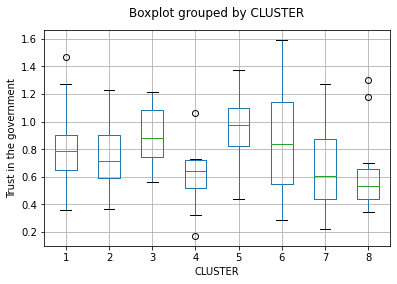

In [61]:
country_problems.boxplot('TRUSTGOV', by='CLUSTER')
plt.title("")
plt.ylabel('Trust in the government')
plt.xticks(range(1, 9), range(1, 9))

([<matplotlib.axis.XTick at 0x1a081906130>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8')])

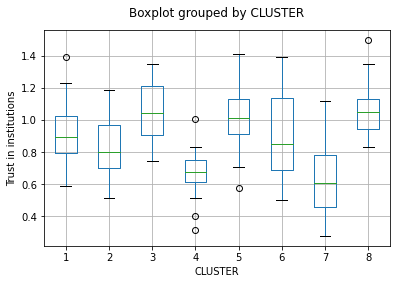

In [62]:
country_problems.boxplot('TRUSTINST', by='CLUSTER')
plt.title("")
plt.ylabel('Trust in institutions')
plt.xticks(range(1, 9), range(1, 9))

([<matplotlib.axis.XTick at 0x1a081f79880>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8')])

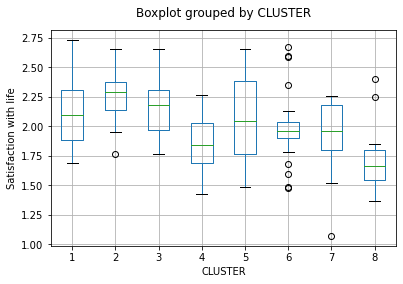

In [63]:
country_problems.boxplot('SATISF', by='CLUSTER')
plt.title("")
plt.ylabel('Satisfaction with life')
plt.xticks(range(1, 9), range(1, 9))

In [64]:
country_problems.shape

(176, 15)

In [65]:
country_problems2 = country_problems
country_problems2['CLUSTER'] = 'Cluster ' + country_problems2['CLUSTER'].astype('str')
country_problems2.head()

,COUNTRY,TRUSTGOV,TRUSTINST,SATISF,EDUCATION,SOCIOECO,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,Latitude,Longitude,CLUSTER
0,Argentina,0.726994,0.897239,1.966258,1.914110,2.616564,Capital Federal,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Poverty,-34.607568,-58.437089,Cluster 3
1,Argentina,1.053571,1.109375,2.151786,2.142857,3.062500,Córdoba,The economy / economic / financial problems,Unemployment / unemployment,Political situation / problems of politics,Other,Crime / public safety,-31.417339,-64.183319,Cluster 3
2,Argentina,0.743590,1.083333,2.230769,1.743590,2.974359,Entre Ríos,Poverty,Unemployment / unemployment,The economy / economic / financial problems,Crime / public safety,Political situation / problems of politics,-31.625284,-59.353958,Cluster 3
3,Argentina,0.590909,0.806818,2.045455,1.795455,2.863636,Neuquén,The economy / economic / financial problems,Crime / public safety,Corruption,Political situation / problems of politics,Other,-38.369506,-69.832275,Cluster 3
4,Argentina,0.904918,1.018033,2.140984,2.190164,2.806557,Provincia de Buenos Aires,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Crime / public safety,Education problems,-36.378993,-60.385589,Cluster 3


In [103]:
anov = ols('TRUSTINST ~ CLUSTER + EDUCATION + SOCIOECO', data=country_problems2).fit()
anov_table = sm.stats.anova_lm(anov, type=2)
print(anov_table)

              df    sum_sq   mean_sq          F        PR(>F)
CLUSTER      7.0  3.033295  0.433328  10.989856  2.251611e-11
EDUCATION    1.0  0.281027  0.281027   7.127281  8.346375e-03
SOCIOECO     1.0  0.226824  0.226824   5.752613  1.757303e-02
Residual   166.0  6.545346  0.039430        NaN           NaN


In [104]:
anov = ols('TRUSTINST ~ CLUSTER', data=country_problems2).fit()
anov_table = sm.stats.anova_lm(anov, type=2)
print(anov_table)

             df    sum_sq   mean_sq          F        PR(>F)
CLUSTER     7.0  3.033295  0.433328  10.321427  9.705982e-11
Residual  168.0  7.053198  0.041983        NaN           NaN


In [105]:
anov = ols('TRUSTGOV ~ CLUSTER + EDUCATION + SOCIOECO', data=country_problems2).fit()
anov_table = sm.stats.anova_lm(anov, type=2)
print(anov_table)

              df     sum_sq   mean_sq          F    PR(>F)
CLUSTER      7.0   2.058872  0.294125   4.599089  0.000101
EDUCATION    1.0   0.926386  0.926386  14.485468  0.000198
SOCIOECO     1.0   0.007918  0.007918   0.123806  0.725389
Residual   166.0  10.616163  0.063953        NaN       NaN


In [106]:
anov = ols('SATISF ~ CLUSTER + EDUCATION + SOCIOECO', data=country_problems2).fit()
anov_table = sm.stats.anova_lm(anov, type=2)
print(anov_table)

              df     sum_sq   mean_sq          F        PR(>F)
CLUSTER      7.0   3.739341  0.534192   8.351979  9.973839e-09
EDUCATION    1.0   0.876660  0.876660  13.706412  2.905205e-04
SOCIOECO     1.0   1.953847  1.953847  30.548010  1.240157e-07
Residual   166.0  10.617339  0.063960        NaN           NaN


In [107]:
test = pairwise_tukeyhsd(country_problems['TRUSTINST'], country_problems['CLUSTER'], alpha=0.05)
print(test)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster 1 Cluster 2   -0.081 0.7788 -0.2463  0.0843  False
Cluster 1 Cluster 3   0.1295 0.2259 -0.0329  0.2919  False
Cluster 1 Cluster 4  -0.2531 0.0025 -0.4478 -0.0584   True
Cluster 1 Cluster 5   0.0977 0.6163 -0.0708  0.2662  False
Cluster 1 Cluster 6   0.0096    0.9 -0.1607  0.1799  False
Cluster 1 Cluster 7  -0.2855 0.0046 -0.5152 -0.0559   True
Cluster 1 Cluster 8   0.1537 0.4037  -0.068  0.3754  False
Cluster 2 Cluster 3   0.2105 0.0033  0.0452  0.3757   True
Cluster 2 Cluster 4  -0.1721 0.1357 -0.3692   0.025  False
Cluster 2 Cluster 5   0.1787 0.0342  0.0074    0.35   True
Cluster 2 Cluster 6   0.0906  0.718 -0.0824  0.2637  False
Cluster 2 Cluster 7  -0.2045 0.1265 -0.4362  0.0272  False
Cluster 2 Cluster 8   0.2347 0.0325  0.0109  0.4585   True
Cluster 3 Cluster 4  -0.3826  0.001 -0.5773 -0.1879   Tr

In [71]:
test = pairwise_tukeyhsd(country_problems['TRUSTGOV'], country_problems['CLUSTER'], alpha=0.05)
print(test)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster 1 Cluster 2  -0.0496    0.9 -0.2611  0.1619  False
Cluster 1 Cluster 3   0.0903 0.8792 -0.1175  0.2981  False
Cluster 1 Cluster 4  -0.1995 0.2211 -0.4487  0.0496  False
Cluster 1 Cluster 5   0.1375 0.5114 -0.0781  0.3532  False
Cluster 1 Cluster 6   0.0677    0.9 -0.1502  0.2857  False
Cluster 1 Cluster 7   -0.128 0.8778 -0.4218  0.1659  False
Cluster 1 Cluster 8  -0.1754 0.5469 -0.4591  0.1083  False
Cluster 2 Cluster 3   0.1399 0.4666 -0.0716  0.3514  False
Cluster 2 Cluster 4  -0.1499 0.5899 -0.4022  0.1023  False
Cluster 2 Cluster 5   0.1871 0.1561 -0.0321  0.4063  False
Cluster 2 Cluster 6   0.1173  0.707 -0.1041  0.3388  False
Cluster 2 Cluster 7  -0.0784    0.9 -0.3749  0.2181  False
Cluster 2 Cluster 8  -0.1258 0.8709 -0.4122  0.1606  False
Cluster 3 Cluster 4  -0.2898 0.0107  -0.539 -0.0407   Tr

In [72]:
test = pairwise_tukeyhsd(country_problems['SATISF'], country_problems['CLUSTER'], alpha=0.05)
print(test)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Cluster 1 Cluster 2   0.1311 0.6262 -0.0971  0.3593  False
Cluster 1 Cluster 3   0.0324    0.9 -0.1918  0.2566  False
Cluster 1 Cluster 4  -0.2797  0.035 -0.5486 -0.0109   True
Cluster 1 Cluster 5  -0.0564    0.9  -0.289  0.1763  False
Cluster 1 Cluster 6  -0.1318 0.6516  -0.367  0.1034  False
Cluster 1 Cluster 7  -0.2288 0.3489 -0.5459  0.0883  False
Cluster 1 Cluster 8  -0.3859 0.0038  -0.692 -0.0798   True
Cluster 2 Cluster 3  -0.0987 0.8834 -0.3268  0.1295  False
Cluster 2 Cluster 4  -0.4108  0.001  -0.683 -0.1387   True
Cluster 2 Cluster 5  -0.1874 0.2329 -0.4239  0.0491  False
Cluster 2 Cluster 6  -0.2629 0.0201 -0.5018 -0.0239   True
Cluster 2 Cluster 7  -0.3599 0.0158 -0.6798 -0.0399   True
Cluster 2 Cluster 8  -0.5169  0.001  -0.826 -0.2079   True
Cluster 3 Cluster 4  -0.3122  0.011  -0.581 -0.0433   Tr

In [73]:
firstprob = pd.DataFrame(country_problems.groupby('1st Most Common Problem')['REGION'].count().sort_values(ascending=False))
firstprob

,REGION
1st Most Common Problem,
Crime / public safety,63
Unemployment / unemployment,33
The economy / economic / financial problems,28
Corruption,18
Political situation / problems of politics,11
Health problems,9
"Food, scarce",7
Violence / gangs,2
Education problems,2


In [74]:
secondprob = pd.DataFrame(country_problems.groupby('2nd Most Common Problem')['REGION'].count().sort_values(ascending=False))
secondprob

,REGION
2nd Most Common Problem,
The economy / economic / financial problems,37
Unemployment / unemployment,34
Crime / public safety,29
Corruption,29
Political situation / problems of politics,14
Violence / gangs,10
"Food, scarce",7
Health problems,4
Education problems,4


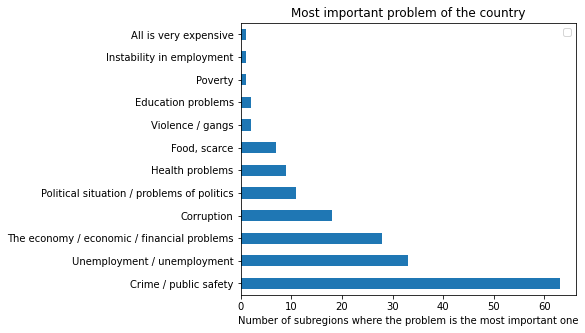

In [75]:
firstprob.plot(kind='barh', figsize=(6, 5))

plt.title('Most important problem of the country')
plt.ylabel('')
plt.xlabel('Number of subregions where the problem is the most important one')
plt.legend('')

plt.show()

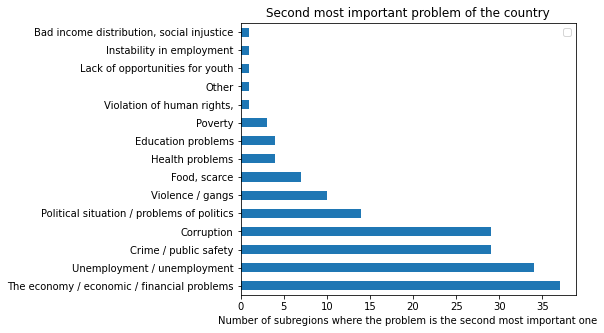

In [76]:
secondprob.plot(kind='barh', figsize=(6, 5))

plt.title('Second most important problem of the country')
plt.ylabel('')
plt.xlabel('Number of subregions where the problem is the second most important one')
plt.legend('')

plt.show()

In [77]:
country_problems.head()

,COUNTRY,TRUSTGOV,TRUSTINST,SATISF,EDUCATION,SOCIOECO,REGION,1st Most Common Problem,2nd Most Common Problem,3rd Most Common Problem,4th Most Common Problem,5th Most Common Problem,Latitude,Longitude,CLUSTER
0,Argentina,0.726994,0.897239,1.966258,1.914110,2.616564,Capital Federal,The economy / economic / financial problems,Unemployment / unemployment,Crime / public safety,Political situation / problems of politics,Poverty,-34.607568,-58.437089,Cluster 3
1,Argentina,1.053571,1.109375,2.151786,2.142857,3.062500,Córdoba,The economy / economic / financial problems,Unemployment / unemployment,Political situation / problems of politics,Other,Crime / public safety,-31.417339,-64.183319,Cluster 3
2,Argentina,0.743590,1.083333,2.230769,1.743590,2.974359,Entre Ríos,Poverty,Unemployment / unemployment,The economy / economic / financial problems,Crime / public safety,Political situation / problems of politics,-31.625284,-59.353958,Cluster 3
3,Argentina,0.590909,0.806818,2.045455,1.795455,2.863636,Neuquén,The economy / economic / financial problems,Crime / public safety,Corruption,Political situation / problems of politics,Other,-38.369506,-69.832275,Cluster 3
4,Argentina,0.904918,1.018033,2.140984,2.190164,2.806557,Provincia de Buenos Aires,The economy / economic / financial problems,Political situation / problems of politics,Unemployment / unemployment,Crime / public safety,Education problems,-36.378993,-60.385589,Cluster 3


In [78]:
country_problems_probs = country_problems555

In [79]:
country_problems_probs.dropna().reset_index(drop=True, inplace=True)

In [80]:
country_problems_probs.head()

,COUNTRY,REGION,PROBLEM,TRUSTGOV,TRUSTCONG,TRUSTPOL,TRUSTJUST,SATISF,EDUCATION,SOCIOECO,TRUSTINST,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,39,41,42,43,44,96,97
0,Argentina,Capital Federal,5,0,2,0,0,2,1,1,0.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Argentina,Capital Federal,35,0,1,0,0,2,1,2,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Argentina,Capital Federal,24,2,1,1,2,2,3,2,1.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Argentina,Capital Federal,96,2,3,3,2,2,1,2,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Argentina,Capital Federal,9,2,2,2,2,2,3,3,2.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
country_problems_probs = country_problems_probs[['COUNTRY', 'PROBLEM']]
country_problems_probs.head()

,COUNTRY,PROBLEM
0,Argentina,5
1,Argentina,35
2,Argentina,24
3,Argentina,96
4,Argentina,9


In [82]:
country_problems_probs.rename(columns={'PROBLEM':'PROBLEM_COUNTRY'}, inplace=True)
country_problems_probs.drop(country_problems_probs[country_problems_probs['PROBLEM_COUNTRY'] < 0].index, inplace=True)
country_problems_probs.reset_index(drop=True, inplace=True)
country_problems_probs.shape

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(15731, 2)

In [83]:
for index, row in country_problems_probs.iterrows():
    if country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] == 24:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'Crime/public safety'
    elif country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] == 5:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'Unemployment'
    elif country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] == 9:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'The economy/financial problems'
    elif country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] == 34:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'Corruption'
    elif country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] == 35:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'Political situation'
    elif country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] == 13:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'Health problems'
    elif country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] == 18:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'Food, scarce'
    elif country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] == 97:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'No problems'
    else:
        country_problems_probs.loc[index, 'PROBLEM_COUNTRY'] = 'Other'
country_problems_probs.head(100)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-83-8b3d5024409f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co

,COUNTRY,PROBLEM_COUNTRY
0,Argentina,Unemployment
1,Argentina,Political situation
2,Argentina,Crime/public safety
3,Argentina,Other
4,Argentina,The economy/financial problems
5,Argentina,Unemployment
6,Argentina,Political situation
7,Argentina,The economy/financial problems
8,Argentina,Corruption
9,Argentina,The economy/financial problems


In [84]:
country_problems_ = pd.DataFrame(country_problems_probs.groupby(['COUNTRY', 'PROBLEM_COUNTRY'])['PROBLEM_COUNTRY'].count()).rename(columns={'PROBLEM_COUNTRY':'COUNT'}).reset_index(drop=False)
country_problems_.head()

,COUNTRY,PROBLEM_COUNTRY,COUNT
0,Argentina,Corruption,41
1,Argentina,Crime/public safety,112
2,Argentina,"Food, scarce",7
3,Argentina,Health problems,15
4,Argentina,No problems,4


In [85]:
counts = pd.DataFrame(country_problems_.groupby('COUNTRY')['COUNT'].sum())
counts

,COUNT
COUNTRY,
Argentina,1049
Bolivia,1014
Brazil,871
Chile,1023
Colombia,1017
Costa Rica,929
Ecuador,917
El Salvador,843
Guatemala,590


In [86]:
TOTAL = []
for i, row in country_problems_.iterrows():
    for index, r in counts.iterrows():
        if row['COUNTRY'] == index:
            TOTAL.append(r['COUNT'])
            break
country_problems_['TOTAL'] = TOTAL
country_problems_['PORTION'] = (country_problems_['COUNT']/country_problems_['TOTAL'])*100
country_problems_.head(20)

,COUNTRY,PROBLEM_COUNTRY,COUNT,TOTAL,PORTION
0,Argentina,Corruption,41,1049,3.908484
1,Argentina,Crime/public safety,112,1049,10.676835
2,Argentina,"Food, scarce",7,1049,0.667302
3,Argentina,Health problems,15,1049,1.429933
4,Argentina,No problems,4,1049,0.381316
5,Argentina,Other,264,1049,25.166826
6,Argentina,Political situation,125,1049,11.916111
7,Argentina,The economy/financial problems,328,1049,31.267874
8,Argentina,Unemployment,153,1049,14.585319
9,Bolivia,Corruption,113,1014,11.143984


In [87]:
country_problems_.groupby('PROBLEM_COUNTRY')['PROBLEM_COUNTRY'].count()

PROBLEM_COUNTRY
Corruption                        18
Crime/public safety               18
Food, scarce                      15
Health problems                   17
No problems                       18
Other                             18
Political situation               18
The economy/financial problems    18
Unemployment                      18
Name: PROBLEM_COUNTRY, dtype: int64

In [88]:
country_problems_['COUNTRY'].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
       'México', 'Nicaragua', 'Panamá', 'Paraguay', 'Perú',
       'República Dominicana', 'Uruguay', 'Venezuela'], dtype=object)

In [89]:
missing_values = pd.DataFrame({"COUNTRY":['Bolivia', 'Chile', 'Paraguay', 'Nicaragua'],
                            "PROBLEM_COUNTRY":['Food, scarce', 'Food, scarce', 'Food, scarce', 'Health problems'],
                            "COUNT":[0, 0, 0, 0],
                            "TOTAL":[1014, 1023, 1086, 689],
                            "PORTION":[0, 0, 0, 0]})
missing_values

,COUNTRY,PROBLEM_COUNTRY,COUNT,TOTAL,PORTION
0,Bolivia,"Food, scarce",0,1014,0
1,Chile,"Food, scarce",0,1023,0
2,Paraguay,"Food, scarce",0,1086,0
3,Nicaragua,Health problems,0,689,0


In [90]:
country_problems_ = country_problems_.append(missing_values, ignore_index=True)
country_problems_

,COUNTRY,PROBLEM_COUNTRY,COUNT,TOTAL,PORTION
0,Argentina,Corruption,41,1049,3.908484
1,Argentina,Crime/public safety,112,1049,10.676835
2,Argentina,"Food, scarce",7,1049,0.667302
3,Argentina,Health problems,15,1049,1.429933
4,Argentina,No problems,4,1049,0.381316
5,Argentina,Other,264,1049,25.166826
6,Argentina,Political situation,125,1049,11.916111
7,Argentina,The economy/financial problems,328,1049,31.267874
8,Argentina,Unemployment,153,1049,14.585319
9,Bolivia,Corruption,113,1014,11.143984


In [91]:
country_problems_ = country_problems_.sort_values(by=['COUNTRY', 'PROBLEM_COUNTRY'], ascending=True)
country_problems_.reset_index(drop=True, inplace=True)
country_problems_

,COUNTRY,PROBLEM_COUNTRY,COUNT,TOTAL,PORTION
0,Argentina,Corruption,41,1049,3.908484
1,Argentina,Crime/public safety,112,1049,10.676835
2,Argentina,"Food, scarce",7,1049,0.667302
3,Argentina,Health problems,15,1049,1.429933
4,Argentina,No problems,4,1049,0.381316
5,Argentina,Other,264,1049,25.166826
6,Argentina,Political situation,125,1049,11.916111
7,Argentina,The economy/financial problems,328,1049,31.267874
8,Argentina,Unemployment,153,1049,14.585319
9,Bolivia,Corruption,113,1014,11.143984


<function matplotlib.pyplot.show(*args, **kw)>

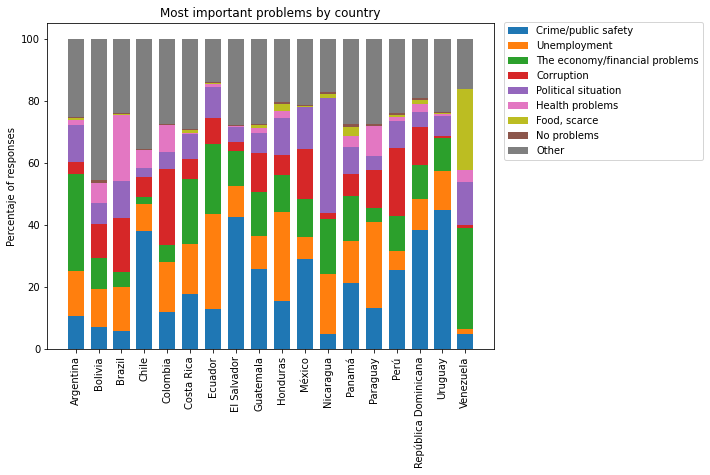

In [92]:
labels = list(country_problems_['COUNTRY'].unique())
crime = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'Crime/public safety']['PORTION']
unemp = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'Unemployment']['PORTION']
finan = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'The economy/financial problems']['PORTION']
corrup = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'Corruption']['PORTION']
polit = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'Political situation']['PORTION']
healt = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'Health problems']['PORTION']
scarc = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'Food, scarce']['PORTION']
noprob = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'No problems']['PORTION']
other = country_problems_[country_problems_['PROBLEM_COUNTRY'] == 'Other']['PORTION']
width = 0.7

bottom_finan = [i + j for i, j in zip(crime, unemp)]
bottom_corrup = [i + j for i, j in zip(bottom_finan, finan)]
bottom_polit = [i + j for i, j in zip(bottom_corrup, corrup)]
bottom_healt = [i + j for i, j in zip(bottom_polit, polit)]
bottom_scarc = [i + j for i, j in zip(bottom_healt, healt)]
bottom_noprob = [i + j for i, j in zip(bottom_scarc, scarc)]
bottom_other = [i + j for i, j in zip(bottom_noprob, noprob)]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, crime, width, color='tab:blue')
ax.bar(labels, unemp, width, bottom=crime, color='tab:orange')
ax.bar(labels, finan, width, bottom=bottom_finan, color='tab:green')
ax.bar(labels, corrup, width, bottom=bottom_corrup, color='tab:red')
ax.bar(labels, polit, width, bottom=bottom_polit, color='tab:purple')
ax.bar(labels, healt, width, bottom=bottom_healt, color='tab:pink')
ax.bar(labels, scarc, width, bottom=bottom_scarc, color='tab:olive')
ax.bar(labels, noprob, width, bottom=bottom_noprob, color='tab:brown')
ax.bar(labels, other, width, bottom=bottom_other, color='tab:gray')

ax.set_ylabel('Percentaje of responses')
ax.set_title('Most important problems by country')
ax.legend(loc='upper right', labels=['Crime/public safety',
                                    'Unemployment',
                                    'The economy/financial problems',
                                    'Corruption',
                                    'Political situation',
                                    'Health problems',
                                    'Food, scarce',
                                    'No problems',
                                    'Other'],
         bbox_to_anchor=(1.48, 1.02))
plt.xticks(rotation=90)
plt.show